# Running tensorflow on Trade data

## Reading data from database

c:\Users\HamedNa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:xlabel='DateTimeEn'>

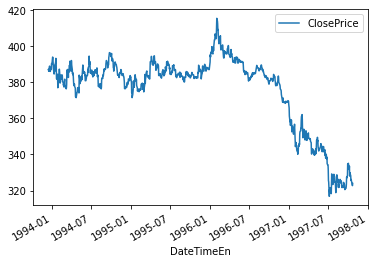

In [4]:
import codes.handlers as hd

rides = hd.ReadPanda('trade-graph', (19857, 500, 1000,))
rides.plot(x='DateTimeEn', y='ClosePrice')

### Reading data to file

First , declareing the input and output data sizes:

In [5]:
INPUT_SIZE = 300
OUTPUT_SIZE = 10

Second, reading data from databse and store it in local files

In [7]:
import codes.trade as trade

loader = trade.TradeReader(INPUT_SIZE, OUTPUT_SIZE, 280000)
loader.ReadData(ignore_existing=False)

The data already have read.


## Creating the model

In [9]:
import keras

DROPOUPT_VALUE = 0.2

model = keras.models.Sequential(name='logits')
model.add(keras.Input(shape=(INPUT_SIZE, 1, 1)))

model.add(keras.layers.Conv2D(3, (10, 1), strides=(2, 1), activation='gelu'))
model.add(keras.layers.Dropout(DROPOUPT_VALUE))
model.add(keras.layers.Conv2D(6, (10, 1), strides=(1, 1), activation='gelu'))
model.add(keras.layers.Dropout(DROPOUPT_VALUE))
model.add(keras.layers.Conv2D(9, (5, 1), strides=(1, 1), activation='gelu'))
model.add(keras.layers.Dropout(DROPOUPT_VALUE))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(60, activation="gelu"))
model.add(keras.layers.Dropout(DROPOUPT_VALUE))
model.add(keras.layers.Dense(OUTPUT_SIZE, activation="sigmoid"))

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "logits"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 146, 1, 3)         33        
                                                                 
 dropout_4 (Dropout)         (None, 146, 1, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 137, 1, 6)         186       
                                                                 
 dropout_5 (Dropout)         (None, 137, 1, 6)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 133, 1, 9)         279       
                                                                 
 dropout_6 (Dropout)         (None, 133, 1, 9)         0         
                                                                 
 flatten_1 (Flatten)         (None, 1197)              0    

## Running tensorflow

In [12]:
import codes.handlers as hd

x_training = hd.LoadFile('trade-x', 4)
y_training = hd.LoadFile('trade-y', 4)

x_testing = hd.LoadFile('trade-x', 1, 4)
y_testing = hd.LoadFile('trade-y', 1, 4)

print("x_training.shape:", x_training.shape)
print("y_training.shape:", y_training.shape)

Loading trade-x-3.npy
Loading finished
Loading trade-y-3.npy
Loading finished
x_training.shape: (250964100,)
y_training.shape: (8365470,)


In [11]:
from keras.callbacks import ModelCheckpoint

check_point_path = 'models/trade-2022-07-25'

# train the model
checkpointer = ModelCheckpoint(filepath=check_point_path, 
                               verbose=1, save_best_only=True)

In [ ]:
hist = model.fit(x_training, y_training, batch_size=512, epochs=1,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)